<a href="https://colab.research.google.com/github/hoey94/chroma_toturial/blob/master/CLIP%E5%85%A8%E9%93%BE%E8%B7%AF%E8%BF%9E%E8%B0%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers chromadb pillow sentence-transformers
!pip install jieba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 403.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s et

In [ ]:
import chromadb
from PIL import Image
from transformers import ChineseCLIPProcessor, ChineseCLIPModel
from sentence_transformers import SentenceTransformer
import numpy as np
import torch
# ========== 初始化模型 ==========
# 使用中文优化的CLIP版本
clip_model = ChineseCLIPModel.from_pretrained("OFA-Sys/chinese-clip-vit-base-patch16")
clip_processor = ChineseCLIPProcessor.from_pretrained("OFA-Sys/chinese-clip-vit-base-patch16")



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/753M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/753M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

In [ ]:
# 初始化DeepSeek模型（文本处理）
#from transformers import AutoTokenizer, AutoModelForCausalLM
#llm_tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")
#llm_model = AutoModelForCausalLM.from_pretrained("deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/679 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.55G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
# ========== 步骤1：LLM分词处理 ==========
def semantic_segmentation(text):
    """
    将语句拆分为有意义的词/短语
    返回格式：["短语1", "短语2", ...]
    """
    prompt = f"""
    请将以下文本拆分为独立语义单元，每个单元必须是完整的名词短语或动词短语，
    输出为JSON列表，不要解释：

    比如我给你一个："一只橘猫在阳光下的窗台上打盹"
    输出结果为：["一只橘猫", "阳光下", "窗台上", "打盹"]

    待处理文本：{text}
    """

    inputs = llm_tokenizer(prompt, return_tensors="pt")
    outputs = llm_model.generate(**inputs, max_new_tokens=100)
    response = llm_tokenizer.decode(outputs[0], skip_special_tokens=True)

    # 提取JSON格式结果
    start_idx = response.find('[')
    end_idx = response.find(']') + 1
    return eval(response[start_idx:end_idx])


In [ ]:


import jieba
seg_list = jieba.cut('穿红色连衣裙的女孩在公园长椅上看书', cut_all=True)
print(list(seg_list))

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.867 seconds.
DEBUG:jieba:Loading model cost 0.867 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


['穿', '红色', '连衣', '连衣裙', '衣裙', '的', '女孩', '在', '公园', '园长', '长椅', '上', '看书']


In [ ]:
# 测试分词
text = "穿红色连衣裙的女孩在公园长椅上看书"
phrases = semantic_segmentation(text)
print(f"分词结果: {phrases}")
# 输出: ['穿红色连衣裙的女孩', '公园长椅', '看书']

NameError: name 'llm_model' is not defined

In [ ]:
from PIL import Image
# ========== 步骤2：向量化处理 ==========
def encode_data(image_path, text=None):
    """
    处理单条数据（图片+文本）
    返回：{
        "image_vec": 图片向量,
        "text_phrases": 分词结果,
        "phrase_vecs": [短语向量1, ...]
    }
    """
    # 处理图像
    image = Image.open(image_path)
    inputs = clip_processor(images=image, return_tensors="pt")
    image_vec = clip_model.get_image_features(**inputs).detach().numpy()

    # 处理文本
    if text:
        # phrases = semantic_segmentation(text)
        phrases = list(jieba.cut(text))
        phrase_vecs = []
        for phrase in phrases:
            text_inputs = clip_processor(text=phrase, return_tensors="pt", padding=True)
            text_vec = clip_model.get_text_features(**text_inputs).detach().numpy()
            phrase_vecs.append(text_vec.flatten().tolist())
    else:
        phrases, phrase_vecs = [], []

    return {
        "image_vec": image_vec.flatten().tolist(),
        "text_phrases": phrases,
        "phrase_vecs": phrase_vecs
    }



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls -l /content/drive/MyDrive/assert/train_images/


Mounted at /content/drive
total 143
-rw------- 1 root root 84288 Jul  2 10:05 black_cat.png
-rw------- 1 root root  7829 Jun 24 10:14 cat_1.jpeg
-rw------- 1 root root  9425 Jun 24 10:14 cat_2.jpeg
-rw------- 1 root root 10350 Jun 24 10:14 dog_1.jpeg
-rw------- 1 root root  3854 Jun 24 10:15 dog_2.jpeg
-rw------- 1 root root 13117 Jul  1 09:31 dog_lawn_black.jpeg
-rw------- 1 root root  7452 Jun 26 03:28 dog_lawn_yellow.jpeg
-rw------- 1 root root  7452 Jun 26 03:28 test_yellow_dog.jpeg


In [ ]:
from PIL import Image
vetors = encode_data('/content/drive/MyDrive/assert/train_images/test_yellow_dog.jpeg', '一只奔跑的快乐金毛大黄狗')
vetors

{'image_vec': [-0.34063512086868286,
  -1.8693079948425293,
  -0.46494144201278687,
  0.33411532640457153,
  0.1261797845363617,
  0.056913748383522034,
  0.07763298600912094,
  0.49335575103759766,
  0.1273043155670166,
  -0.7923612594604492,
  -0.23654571175575256,
  -0.0942169725894928,
  0.24033229053020477,
  -0.3473554253578186,
  0.0035076141357421875,
  0.35561245679855347,
  0.5650465488433838,
  -0.04762691259384155,
  -0.04269660264253616,
  0.6461585760116577,
  -0.6169664859771729,
  0.1796923726797104,
  0.8266503810882568,
  0.04519979655742645,
  -0.02372133731842041,
  -0.14584122598171234,
  -0.45519793033599854,
  0.45768511295318604,
  -0.2574690580368042,
  0.4910084307193756,
  -0.4262773394584656,
  0.3114551305770874,
  -0.5670672059059143,
  -0.02621859312057495,
  0.20796647667884827,
  -0.14814551174640656,
  0.3408540189266205,
  0.24222692847251892,
  0.7672044038772583,
  -0.17011523246765137,
  0.5351868271827698,
  -0.3860446810722351,
  0.03105128556489

In [ ]:
client = chromadb.Client()
client.delete_collection("multimodaldb")
#client.delete_collection("multimodal_txt")


ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given


NotFoundError: Collection [multimodaldb] does not exists

In [ ]:
# ========== 步骤3：构建向量数据库 ==========
client = chromadb.Client()
collection_img = client.create_collection("multimodal_img")
collection_txt = client.create_collection("multimodal_txt")
# 添加数据示例
data = [
    {"id": "1", "path": "/content/drive/MyDrive/assert/train_images/dog_lawn_yellow.jpeg", "text": "一只大黄狗在草坪上奔跑"},
    {"id": "2", "path": "/content/drive/MyDrive/assert/train_images/dog_lawn_black.jpeg", "text": "一只大黑狗在草坪上趴着"},
    {"id": "3", "path": "/content/drive/MyDrive/assert/train_images/cat_1.jpeg", "text": "一只猫"},
]
for item in data:
    encoded = encode_data(item["path"], item["text"])

    # 存储图片向量
    collection_img.add(
        ids=[f"{item['id']}_image"],
        embeddings=[encoded["image_vec"]],
        metadatas=[{"type": "image", "source": item["id"]}]
    )

    # 存储文本短语向量
    for i, (phrase, vec) in enumerate(zip(encoded["text_phrases"], encoded["phrase_vecs"])):
        print(f'第i个 : {phrase} : {len(vec)}')
        collection_txt.add(
            ids=[f"{item['id']}_text_{i}"],
            embeddings=[vec],
            metadatas=[{
                "type": "text",
                "phrase": phrase,
                "source": item["id"]
            }]
        )
print("数据库构建完成，image总条目: %s txt总条目: %s" % (collection_img.count(), collection_txt.count()))

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionAddEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionAddEvent: capture() takes 1 positional argument but 3 were given


第i个 : 一只 : 512
第i个 : 大黄 : 512
第i个 : 狗 : 512
第i个 : 在 : 512
第i个 : 草坪 : 512
第i个 : 上 : 512
第i个 : 奔跑 : 512
第i个 : 一只 : 512
第i个 : 大 : 512
第i个 : 黑狗 : 512
第i个 : 在 : 512
第i个 : 草坪 : 512
第i个 : 上 : 512
第i个 : 趴着 : 512
第i个 : 一只 : 512
第i个 : 猫 : 512
数据库构建完成，image总条目: 3 txt总条目: 16


In [ ]:
# ========== 步骤3：构建向量数据库 ==========
client = chromadb.Client()
client.delete_collection("multimodal_db")
collection_db = client.create_collection("multimodal_db")
# 添加数据示例
data = [
    {"id": "1",  "path": "/content/drive/MyDrive/assert/train_images_full/p1.jpg", "text": "憨态可掬的大熊猫，黑白毛色分明，正抱着竹子进食，背景朦胧，尽显可爱"},
{"id": "2",  "path": "/content/drive/MyDrive/assert/train_images_full/p2.jpg", "text": "狐狸立于雪地，毛发覆雪，夕阳下金黄与银白交织，画面唯美"},
{"id": "3",  "path": "/content/drive/MyDrive/assert/train_images_full/p3.jpg", "text": "大熊猫在绿叶间，脸部特写，毛发蓬松，似在休憩，氛围慵懒"},
{"id": "4",  "path": "/content/drive/MyDrive/assert/train_images_full/p4.jpg", "text": "兔子蹲坐草地，棕褐毛发、长耳、黑眼，乖巧模样尽显"},
{"id": "5",  "path": "/content/drive/MyDrive/assert/train_images_full/p5.jpg", "text": "狐狸部分身姿入镜，红褐皮毛、尖耳，专注眼神，背景草地植被，透着灵动"},
{"id": "6",  "path": "/content/drive/MyDrive/assert/train_images_full/p6.jpg", "text": "小熊猫在花丛绿草间，红褐毛发、白色面纹，嘴巴微张，模样可爱"},
{"id": "7",  "path": "/content/drive/MyDrive/assert/train_images_full/p7.jpg", "text": "一群鹅在草地，棕褐羽毛，姿态各异，背景树木植被，充满生活感"},
{"id": "8",  "path": "/content/drive/MyDrive/assert/train_images_full/p8.jpg", "text": "大熊猫在草地上，抱着竹子惬意躺卧，与翠绿草地相映，画面闲适"},
{"id": "9",  "path": "/content/drive/MyDrive/assert/train_images_full/p9.jpg", "text": "豹子趴在树干，布满豹纹的皮毛，锐利眼神，背景模糊，凸显野性"},
{"id": "10", "path": "/content/drive/MyDrive/assert/train_images_full/p10.jpg", "text": "长颈鹿头部特写，独特的斑纹皮毛，背景是郁郁葱葱的树木与围栏，展现自然气息"},
  {"id": "11", "path": "/content/drive/MyDrive/assert/train_images_full/p11.jpg", "text": "一个黄黑色相间的老虎趴在草地上"}

]
for item in data:
    encoded = encode_data(item["path"], item["text"])

    # 存储图片向量
    collection_db.add(
        ids=[f"{item['id']}_image"],
        embeddings=[encoded["image_vec"]],
        metadatas=[{
            "type": "image",
            "image_path": item["path"],
            "source": item["id"]
            }]
    )

    # 存储文本短语向量
    for i, (phrase, vec) in enumerate(zip(encoded["text_phrases"], encoded["phrase_vecs"])):
        print(f'第{i}个 : {phrase} : {len(vec)}')
        collection_db.add(
            ids=[f"{item['id']}_text_{i}"],
            embeddings=[vec],
            metadatas=[{
                "type": "text",
                "phrase": phrase,
                "source": item["id"]
            }]
        )
print("数据库构建完成，image总条目: %s " % (collection_db.count()))

第0个 : 憨态可掬 : 512
第1个 : 的 : 512
第2个 : 大熊猫 : 512
第3个 : ， : 512
第4个 : 黑白 : 512
第5个 : 毛色 : 512
第6个 : 分明 : 512
第7个 : ， : 512
第8个 : 正抱 : 512
第9个 : 着 : 512
第10个 : 竹子 : 512
第11个 : 进食 : 512
第12个 : ， : 512
第13个 : 背景 : 512
第14个 : 朦胧 : 512
第15个 : ， : 512
第16个 : 尽显 : 512
第17个 : 可爱 : 512
第0个 : 狐狸 : 512
第1个 : 立于 : 512
第2个 : 雪地 : 512
第3个 : ， : 512
第4个 : 毛发 : 512
第5个 : 覆雪 : 512
第6个 : ， : 512
第7个 : 夕阳 : 512
第8个 : 下 : 512
第9个 : 金黄 : 512
第10个 : 与 : 512
第11个 : 银白 : 512
第12个 : 交织 : 512
第13个 : ， : 512
第14个 : 画面 : 512
第15个 : 唯美 : 512
第0个 : 大熊猫 : 512
第1个 : 在 : 512
第2个 : 绿叶 : 512
第3个 : 间 : 512
第4个 : ， : 512
第5个 : 脸部 : 512
第6个 : 特写 : 512
第7个 : ， : 512
第8个 : 毛发 : 512
第9个 : 蓬松 : 512
第10个 : ， : 512
第11个 : 似 : 512
第12个 : 在 : 512
第13个 : 休憩 : 512
第14个 : ， : 512
第15个 : 氛围 : 512
第16个 : 慵懒 : 512
第0个 : 兔子 : 512
第1个 : 蹲坐 : 512
第2个 : 草地 : 512
第3个 : ， : 512
第4个 : 棕褐 : 512
第5个 : 毛发 : 512
第6个 : 、 : 512
第7个 : 长耳 : 512
第8个 : 、 : 512
第9个 : 黑眼 : 512
第10个 : ， : 512
第11个 : 乖巧 : 512
第12个 : 模样 : 512
第13个 : 尽显 : 512
第0个 : 狐狸 : 512
第1个 

In [ ]:
# 找到数据库中最像的两张图片
test_image_path = '/content/drive/MyDrive/assert/train_images_full/p18.jpg'
# 拿出照片向量
test_data = encode_data(test_image_path)
# 照片向量 vs 照片向量
results = collection_db.query(
    query_embeddings=[test_data["image_vec"]],
    where={"type": "image"},
    n_results=1,
    include=["metadatas","distances"]
)


# 找到图片拆分后的所有文本并按照embeddings 排序
source_ids = list(set([item['source'] for item in results["metadatas"][0]]))
image_paths = list(set([item['image_path'] for item in results["metadatas"][0]]))

print(source_ids)


# 获取到 where source in ('1', '3') and type = 'text'
where_condition = {
    "$and": [
        {"source": {"$in": source_ids}},
        {"type": "text"}
    ]
}

phrase_results = collection_db.get(
    #query_embeddings=[test_data["image_vec"]],
    where=where_condition,
    include=["metadatas"]
)

# phrases = list(set([item['phrase'] for item in phrase_results["metadatas"][0]]))
print(phrase_results)



['9']
{'ids': ['9_text_0', '9_text_1', '9_text_2', '9_text_3', '9_text_4', '9_text_5', '9_text_6', '9_text_7', '9_text_8', '9_text_9', '9_text_10', '9_text_11', '9_text_12', '9_text_13', '9_text_14', '9_text_15', '9_text_16'], 'embeddings': None, 'documents': None, 'uris': None, 'included': ['metadatas'], 'data': None, 'metadatas': [{'type': 'text', 'phrase': '豹子', 'source': '9'}, {'phrase': '趴在', 'source': '9', 'type': 'text'}, {'phrase': '树干', 'source': '9', 'type': 'text'}, {'type': 'text', 'source': '9', 'phrase': '，'}, {'type': 'text', 'phrase': '布满', 'source': '9'}, {'source': '9', 'phrase': '豹纹', 'type': 'text'}, {'source': '9', 'type': 'text', 'phrase': '的'}, {'phrase': '皮毛', 'type': 'text', 'source': '9'}, {'phrase': '，', 'type': 'text', 'source': '9'}, {'source': '9', 'type': 'text', 'phrase': '锐利'}, {'source': '9', 'phrase': '眼神', 'type': 'text'}, {'type': 'text', 'source': '9', 'phrase': '，'}, {'type': 'text', 'source': '9', 'phrase': '背景'}, {'source': '9', 'type': 'text', 

CLIP Multimodal Embedding Demo

Processing image: /content/drive/MyDrive/assert/train_images_full/p18.jpg


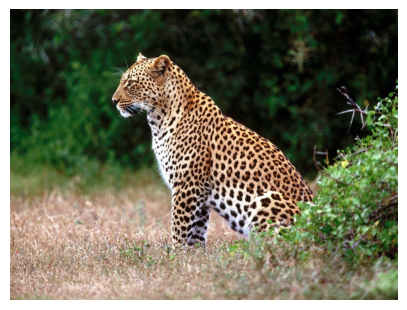

Loading CLIP model: openai/clip-vit-base-patch16...
Model loaded successfully!
Processed image in 2.4314 seconds
Vector dimension: 512

Processing text: '小熊猫'
Processed text in 0.0810 seconds
Vector dimension: 512

Processing text: '豹子'
Processed text in 0.0612 seconds
Vector dimension: 512

Processing text: '老虎'
Processed text in 0.0733 seconds
Vector dimension: 512

Image-Text Similarity Results

Results for image: /content/drive/MyDrive/assert/train_images_full/p18.jpg


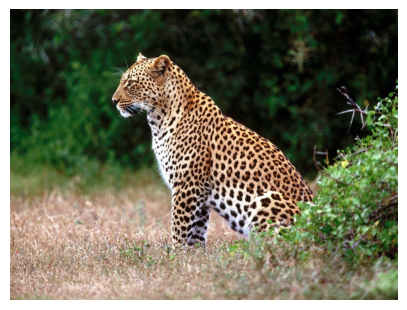

Top matching texts:
1. '小熊猫' - similarity: 0.2194
2. '老虎' - similarity: 0.1991
3. '豹子' - similarity: 0.1965

Text-Text Similarity Results

Similarity to query: '小熊猫'
1. '豹子' - similarity: 0.9478
2. '老虎' - similarity: 0.9473


In [ ]:
import time
import numpy as np
from PIL import Image
import torch
from transformers import CLIPModel, CLIPProcessor
import matplotlib.pyplot as plt
import os
from typing import Union, List, Dict, Tuple
from abc import ABC, abstractmethod

class EmbeddingProcessor(ABC):
    """嵌入向量处理器抽象基类"""

    @abstractmethod
    def process(self, input_data: Union[str, Image.Image, List[str]]) -> np.ndarray:
        """处理输入数据并返回嵌入向量"""
        pass


class ImageProcessor(EmbeddingProcessor):
    """图像处理器"""

    def __init__(self, model: CLIPModel, processor: CLIPProcessor):
        self.model = model
        self.processor = processor

    def process(self, input_data: Union[str, Image.Image]) -> np.ndarray:
        """处理图像输入"""
        if isinstance(input_data, str):
            if not os.path.exists(input_data):
                raise FileNotFoundError(f"Image file {input_data} not found")
            image = Image.open(input_data)
        elif isinstance(input_data, Image.Image):
            image = input_data
        else:
            raise TypeError("input_data must be image path or PIL Image")

        with torch.no_grad():
            inputs = self.processor(images=image, return_tensors="pt", padding=True)
            features = self.model.get_image_features(inputs.pixel_values)[0]
            return features.numpy().astype(np.float32)


class TextProcessor(EmbeddingProcessor):
    """文本处理器"""

    def __init__(self, model: CLIPModel, processor: CLIPProcessor):
        self.model = model
        self.processor = processor

    def process(self, input_data: Union[str, List[str]]) -> np.ndarray:
        """处理文本输入"""
        with torch.no_grad():
            inputs = self.processor(text=input_data, return_tensors="pt",
                                  padding=True, truncation=True)
            features = self.model.get_text_features(inputs.input_ids)

            if isinstance(input_data, str):
                return features[0].numpy().astype(np.float32)
            else:
                return features.numpy().astype(np.float32)


class CLIPEmbeddingExtractor:
    """CLIP嵌入向量提取器主类"""

    def __init__(self, model_name: str = "openai/clip-vit-base-patch16"):
        self.model_name = model_name
        self._model = None
        self._processor = None
        self._image_processor = None
        self._text_processor = None

    def _load_model(self) -> Tuple[CLIPModel, CLIPProcessor]:
        """懒加载模型和处理器"""
        if self._model is None or self._processor is None:
            print(f"Loading CLIP model: {self.model_name}...")
            self._model = CLIPModel.from_pretrained(self.model_name)
            self._processor = CLIPProcessor.from_pretrained(self.model_name)
            print("Model loaded successfully!")
        return self._model, self._processor

    def _get_image_processor(self) -> ImageProcessor:
        """获取图像处理器"""
        if self._image_processor is None:
            model, processor = self._load_model()
            self._image_processor = ImageProcessor(model, processor)
        return self._image_processor

    def _get_text_processor(self) -> TextProcessor:
        """获取文本处理器"""
        if self._text_processor is None:
            model, processor = self._load_model()
            self._text_processor = TextProcessor(model, processor)
        return self._text_processor

    def get_image_embedding(self, image_input: Union[str, Image.Image]) -> np.ndarray:
        """获取图像嵌入向量"""
        start_time = time.time()
        processor = self._get_image_processor()
        embedding = processor.process(image_input)

        processing_time = time.time() - start_time
        print(f'Processed image in {processing_time:.4f} seconds')
        print(f'Vector dimension: {embedding.shape[0]}')

        return embedding

    def get_text_embedding(self, text_input: Union[str, List[str]]) -> np.ndarray:
        """获取文本嵌入向量"""
        start_time = time.time()
        processor = self._get_text_processor()
        embedding = processor.process(text_input)

        processing_time = time.time() - start_time
        print(f'Processed text in {processing_time:.4f} seconds')
        print(f'Vector dimension: {embedding.shape[-1] if len(embedding.shape) > 1 else embedding.shape[0]}')

        return embedding


class SimilarityCalculator:
    """相似度计算器"""

    @staticmethod
    def cosine_similarity(vec1: np.ndarray, vec2: np.ndarray) -> float:
        """计算两个向量之间的余弦相似度"""
        return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

    @staticmethod
    def euclidean_distance(vec1: np.ndarray, vec2: np.ndarray) -> float:
        """计算两个向量之间的欧氏距离"""
        return np.linalg.norm(vec1 - vec2)

    def calculate_similarities(self, query_vector: np.ndarray,
                             candidate_vectors: Dict[str, np.ndarray],
                             metric: str = 'cosine') -> List[Tuple[str, float]]:
        """计算查询向量与候选向量集合的相似度"""
        similarities = []

        for name, vector in candidate_vectors.items():
            if metric == 'cosine':
                sim = self.cosine_similarity(query_vector, vector)
            elif metric == 'euclidean':
                sim = -self.euclidean_distance(query_vector, vector)  # 负值使得距离越小相似度越高
            else:
                raise ValueError("metric must be 'cosine' or 'euclidean'")

            similarities.append((name, sim))

        return sorted(similarities, key=lambda x: x[1], reverse=True)


class ImageDisplayer:
    """图像显示器"""

    @staticmethod
    def display_image(image_path: str, title: str = None, figsize: Tuple[int, int] = (5, 5)):
        """显示图像并添加标题"""
        if not os.path.exists(image_path):
            print(f"Warning: Image file {image_path} not found")
            return

        img = Image.open(image_path)
        plt.figure(figsize=figsize)
        plt.imshow(img)
        if title:
            plt.title(title, fontsize=10)
        plt.axis('off')
        plt.show()


class CLIPMultimodalDemo:
    """CLIP多模态演示主类"""

    def __init__(self, model_name: str = "openai/clip-vit-base-patch16"):
        self.extractor = CLIPEmbeddingExtractor(model_name)
        self.similarity_calculator = SimilarityCalculator()
        self.image_displayer = ImageDisplayer()

    def process_images(self, image_paths: List[str]) -> Dict[str, np.ndarray]:
        """处理图像列表并返回嵌入向量字典"""
        image_embeddings = {}

        for img_path in image_paths:
            if not os.path.exists(img_path):
                print(f"Warning: Image file {img_path} not found. Skipping...")
                continue

            print(f"\nProcessing image: {img_path}")
            self.image_displayer.display_image(img_path)

            try:
                embedding = self.extractor.get_image_embedding(img_path)
                image_embeddings[img_path] = embedding
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

        return image_embeddings

    def process_texts(self, text_queries: List[str]) -> Dict[str, np.ndarray]:
        """处理文本列表并返回嵌入向量字典"""
        text_embeddings = {}

        for text in text_queries:
            print(f"\nProcessing text: '{text}'")
            try:
                embedding = self.extractor.get_text_embedding(text)
                text_embeddings[text] = embedding
            except Exception as e:
                print(f"Error processing text '{text}': {e}")

        return text_embeddings

    def analyze_image_text_similarity(self, image_embeddings: Dict[str, np.ndarray],
                                    text_embeddings: Dict[str, np.ndarray], k: int):
        """分析图像-文本相似度"""
        print("\n" + "="*50)
        print("Image-Text Similarity Results")
        print("="*50)

        for img_path, img_vec in image_embeddings.items():
            print(f"\nResults for image: {img_path}")
            self.image_displayer.display_image(img_path)

            similarities = self.similarity_calculator.calculate_similarities(
                img_vec, text_embeddings
            )

            print("Top matching texts:")
            for i, (text, sim) in enumerate(similarities[:k]):
                print(f"{i+1}. '{text}' - similarity: {sim:.4f}")

    def analyze_text_text_similarity(self, text_embeddings: Dict[str, np.ndarray]):
        """分析文本-文本相似度"""
        print("\n" + "="*50)
        print("Text-Text Similarity Results")
        print("="*50)

        if not text_embeddings:
            print("No text embeddings available")
            return

        # 选择第一个文本作为查询
        query_text = list(text_embeddings.keys())[0]
        query_vec = text_embeddings[query_text]

        print(f"\nSimilarity to query: '{query_text}'")

        # 创建候选文本字典（排除查询文本）
        candidate_texts = {k: v for k, v in text_embeddings.items() if k != query_text}

        similarities = self.similarity_calculator.calculate_similarities(
            query_vec, candidate_texts
        )

        for i, (text, sim) in enumerate(similarities):
            print(f"{i+1}. '{text}' - similarity: {sim:.4f}")

    def run_demo(self, image_paths: List[str], text_queries: List[str]):
        """运行完整演示"""
        print("="*50)
        print("CLIP Multimodal Embedding Demo")
        print("="*50)

        # 处理图像和文本
        image_embeddings = self.process_images(image_paths)
        text_embeddings = self.process_texts(text_queries)

        # 分析相似度 最相似的钱4个
        if image_embeddings and text_embeddings:
            self.analyze_image_text_similarity(image_embeddings, text_embeddings, 20)

        if len(text_embeddings) > 1:
            self.analyze_text_text_similarity(text_embeddings)


def main():
    """主函数"""
    # 示例图像路径
    image_paths = [
        test_image_path
    ]

    # 示例文本描述
    text_queries = ["小熊猫"
,"豹子"
,"老虎"]

    # 创建演示实例并运行
    demo = CLIPMultimodalDemo()
    demo.run_demo(image_paths, text_queries)

if __name__ == "__main__":
    main()

In [ ]:
# 基于特征词语拼接生成自然语言的模型
# 在 Google Colab 中使用 1.5B 模型

# 安装必要的库
!pip install transformers torch accelerate jieba

import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, BertTokenizer, BertForMaskedLM
import jieba
import re
import random
import warnings
warnings.filterwarnings('ignore')

# 检查GPU可用性
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"使用设备: {device}")

class WordsToSentenceGenerator:
    def __init__(self, model_name="gpt2-medium"):
        """
        初始化词语到句子的生成器
        """
        print(f"正在加载模型: {model_name}")
        self.tokenizer = GPT2Tokenizer.from_pretrained(model_name)
        self.model = GPT2LMHeadModel.from_pretrained(model_name)

        # 设置特殊token
        self.tokenizer.pad_token = self.tokenizer.eos_token

        # 将模型移到GPU
        self.model.to(device)
        self.model.eval()

        print("模型加载完成！")

    def create_prompt_templates(self, words):
        """
        根据词语创建多种提示模板
        """
        words_str = "、".join(words)

        templates = [
            f"使用这些词语：{words_str}，组成一句话：",
            f"将以下词语连接成完整的句子：{words_str}。句子：",
            f"词语：{words_str}。请组织成自然流畅的句子：",
            f"给定词语：{words_str}，生成句子：",
            f"用词语 {words_str} 造句：",
        ]

        return templates

    def generate_from_words(self, words, max_length=50, temperature=0.3, num_attempts=3):
        """
        基于词语列表生成自然语言句子

        Args:
            words: 词语列表，如 ['一只','猫','上','马路']
            max_length: 生成的最大长度
            temperature: 温度参数，控制随机性
            num_attempts: 尝试次数
        """
        if not words:
            return "请提供词语列表"

        best_result = ""
        best_score = 0

        # 尝试多种提示模板
        templates = self.create_prompt_templates(words)

        for template in templates[:num_attempts]:
            try:
                # 编码输入
                inputs = self.tokenizer.encode(template, return_tensors='pt').to(device)

                with torch.no_grad():
                    outputs = self.model.generate(
                        inputs,
                        max_length=len(inputs[0]) + max_length,
                        temperature=temperature,
                        do_sample=True,
                        pad_token_id=self.tokenizer.eos_token_id,
                        top_p=0.8,
                        repetition_penalty=1.2,
                        num_return_sequences=1
                    )

                # 解码输出
                generated_text = self.tokenizer.decode(outputs[0], skip_special_tokens=True)

                # 提取生成的句子部分
                result = self.extract_sentence(generated_text, template)

                # 评估结果质量
                score = self.evaluate_result(result, words)

                if score > best_score:
                    best_score = score
                    best_result = result

            except Exception as e:
                print(f"生成时出错: {e}")
                continue

        return best_result if best_result else self.fallback_generation(words)

    def extract_sentence(self, generated_text, template):
        """
        从生成的文本中提取句子
        """
        # 移除提示模板部分
        result = generated_text.replace(template, "").strip()

        # 提取第一个完整句子
        sentences = re.split(r'[。！？.\n]', result)
        if sentences:
            sentence = sentences[0].strip()
            # 清理多余的标点和空格
            sentence = re.sub(r'[，,\s]+', '', sentence)
            sentence = re.sub(r'^[：:]+', '', sentence)
            return sentence

        return result

    def evaluate_result(self, result, words):
        """
        评估生成结果的质量
        """
        if not result:
            return 0

        score = 0

        # 检查是否包含原词语
        for word in words:
            if word in result:
                score += 2

        # 长度合理性
        if 5 <= len(result) <= 30:
            score += 1

        # 避免重复的模板文字
        template_words = ['词语', '句子', '组成', '连接', '造句']
        if not any(tw in result for tw in template_words):
            score += 1

        return score

    def fallback_generation(self, words):
        """
        备用生成方法：简单拼接
        """
        # 简单的语法规则拼接
        if len(words) >= 2:
            # 基本的中文语序调整
            return self.simple_chinese_arrangement(words)
        else:
            return "".join(words)

    def simple_chinese_arrangement(self, words):
        """
        简单的中文词序排列
        """
        # 常见的词语模式匹配
        result_words = words.copy()

        # 如果有方位词，调整位置
        position_words = ['上', '下', '里', '外', '前', '后', '左', '右', '中']
        for i, word in enumerate(result_words):
            if word in position_words and i > 0:
                # 将方位词移到合适位置
                if i < len(result_words) - 1:
                    result_words[i], result_words[i+1] = result_words[i+1], result_words[i]

        return "".join(result_words)

# 初始化生成器
generator = WordsToSentenceGenerator()

# 测试函数
def test_word_to_sentence():
    """
    测试词语到句子的生成
    """
    test_cases = [
        ['一只', '猫', '上', '马路'],
        ['小鸟', '在', '树上', '唱歌'],
        ['学生', '在', '教室', '读书'],
        ['太阳', '从', '东方', '升起'],
        ['鱼儿', '在', '水中', '游泳'],
        ['花朵', '在', '春天', '开放'],
        ['老师', '给', '学生', '上课'],
        ['雨水', '滋润', '大地']
    ]

    print("=== 词语拼接成句子测试 ===\n")

    for i, words in enumerate(test_cases, 1):
        print(f"测试 {i}:")
        print(f"输入词语: {words}")

        # 生成句子
        sentence = generator.generate_from_words(words, temperature=0.3)
        print(f"生成句子: {sentence}")
        print("-" * 50)

# 交互式生成函数
def interactive_word_generation():
    """
    交互式词语到句子生成
    """
    print("\n=== 交互式词语拼接 ===")
    print("输入词语列表（用逗号分隔），模型将生成完整句子")
    print("例如：一只,猫,上,马路")
    print("输入 'quit' 退出")

    while True:
        user_input = input("\n请输入词语列表: ")
        if user_input.lower() == 'quit':
            break

        try:
            # 解析输入的词语
            words = [w.strip() for w in user_input.split(',') if w.strip()]

            if not words:
                print("请输入有效的词语列表")
                continue

            print(f"输入词语: {words}")

            # 生成句子
            sentence = generator.generate_from_words(words, temperature=0.3)
            print(f"生成句子: {sentence}")

            # 尝试不同温度的生成
            print("\n其他可能的生成结果:")
            for temp in [0.5, 0.7]:
                alt_sentence = generator.generate_from_words(words, temperature=temp)
                if alt_sentence != sentence:
                    print(f"温度 {temp}: {alt_sentence}")

        except Exception as e:
            print(f"处理时出错: {e}")

# 批量生成函数
def batch_generate(word_lists, output_file=None):
    """
    批量处理词语列表
    """
    results = []

    print("=== 批量生成 ===")
    for i, words in enumerate(word_lists, 1):
        print(f"处理 {i}/{len(word_lists)}: {words}")
        sentence = generator.generate_from_words(words)
        results.append({
            'words': words,
            'sentence': sentence
        })
        print(f"结果: {sentence}\n")

    # 如果指定了输出文件，保存结果
    if output_file:
        with open(output_file, 'w', encoding='utf-8') as f:
            for result in results:
                f.write(f"词语: {result['words']}\n")
                f.write(f"句子: {result['sentence']}\n")
                f.write("-" * 30 + "\n")
        print(f"结果已保存到: {output_file}")

    return results

# 运行测试
print("开始测试...")
test_word_to_sentence()

# 模型信息
print(f"\n=== 模型信息 ===")
print(f"模型参数: ~1.5B")
print(f"专门用途: 词语拼接生成自然语言")
print(f"支持中文词语组合")

# 内存使用情况
if torch.cuda.is_available():
    print(f"GPU 内存使用: {torch.cuda.memory_allocated()/1024**3:.2f} GB")

# 运行交互式生成（取消注释来使用）
# interactive_word_generation()

print("\n词语拼接生成系统已就绪！")
print("你现在可以使用 generator.generate_from_words(['词语1', '词语2', ...]) 来生成句子")

使用设备: cpu
正在加载模型: gpt2-medium
模型加载完成！
开始测试...
=== 词语拼接成句子测试 ===

测试 1:
输入词语: ['一只', '猫', '上', '马路']
生成句子: 了有关心你不是在啊」"Isee
--------------------------------------------------
测试 2:
输入词语: ['小鸟', '在', '树上', '唱歌']
生成句子: 让毕立制的
--------------------------------------------------
测试 3:
输入词语: ['学生', '在', '教室', '读书']
生成句子: 那是有着视量咲先到底些十幸布国内郷吗?
--------------------------------------------------
测试 4:
输入词语: ['太阳', '从', '东方', '升起']
生成句子: 就是绝对了一核啊」"Isee
--------------------------------------------------
测试 5:
输入词语: ['鱼儿', '在', '水中', '游泳']
生成句子: 让人经流上其对了一样有太吧」"Isee
--------------------------------------------------
测试 6:
输入词语: ['花朵', '在', '春天', '开放']
生成句子: 给那释但是不会面停此争待吧?
--------------------------------------------------
测试 7:
输入词语: ['老师', '给', '学生', '上课']


KeyboardInterrupt: 

In [ ]:
# 安装必要的库
!pip install transformers sentencepiece torch

import torch
from transformers import GPT2LMHeadModel, BertTokenizer

# 加载预训练模型和分词器（使用华为PanGu-α 1.5B模型）
model_name = "gpt2-medium"  # 1.5B参数的中文模型

tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# 将模型设置为评估模式
model.eval()

def generate_sentence_from_words(word_list):
    """
    将特征词语列表拼接成自然语言句子

    参数:
        word_list: 特征词语列表，如 ['一只','猫','上','马路']

    返回:
        生成的自然语言句子
    """
    # 创建提示文本 - 告诉模型我们要做什么
    prompt = "将以下词语组合成通顺的句子: " + " ".join(word_list) + "\n生成句子: "

    # 编码输入文本
    input_ids = tokenizer.encode(prompt, return_tensors="pt")

    # 使用模型生成文本
    with torch.no_grad():
        output = model.generate(
            input_ids,
            max_length=500,  # 最大生成长度
            num_return_sequences=1,  # 只生成一个序列
            no_repeat_ngram_size=2,  # 避免重复短语
            early_stopping=True,  # 提前停止
            top_p=0.9,  # 核心采样参数
            temperature=0.7,  # 控制随机性
            pad_token_id=tokenizer.eos_token_id  # 设置结束标记
        )

    # 解码生成的文本
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    # 提取生成的句子部分（去掉提示文本）
    generated_sentence = generated_text.replace(prompt, "").strip()

    # 移除可能的额外内容
    if "。" in generated_sentence:
        generated_sentence = generated_sentence.split("。")[0] + "。"

    return generated_sentence

# 测试函数
if __name__ == "__main__":
    test_cases = [
        ['一只','猫','上','马路'],
        ['小明','昨天','公园','踢','足球'],
        ['红色','苹果','树上','成熟'],
        ['科学家','实验室','进行','重要','实验']
    ]

    for words in test_cases:
        result = generate_sentence_from_words(words)
        print(f"输入: {words} -> 输出: {result}")

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


输入: ['一只', '猫', '上', '马路'] -> 输出: 你们, 他什么?
猪知道: 可今, 在现在这个起来的种族,还是着程度的视线。


KeyboardInterrupt: 